In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
import pandas as pd
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('irisdata')
df.replace('Iris-setosa',1,inplace=True)
df.replace('Iris-versicolor',2,inplace=True)
df.replace('Iris-virginica',3,inplace=True)
full_data=df.astype(float).values.tolist()   
print(full_data)

[[5.1, 3.5, 1.4, 0.2, 1.0], [4.9, 3.0, 1.4, 0.2, 1.0], [4.7, 3.2, 1.3, 0.2, 1.0], [4.6, 3.1, 1.5, 0.2, 1.0], [5.0, 3.6, 1.4, 0.2, 1.0], [5.4, 3.9, 1.7, 0.4, 1.0], [4.6, 3.4, 1.4, 0.3, 1.0], [5.0, 3.4, 1.5, 0.2, 1.0], [4.4, 2.9, 1.4, 0.2, 1.0], [4.9, 3.1, 1.5, 0.1, 1.0], [5.4, 3.7, 1.5, 0.2, 1.0], [4.8, 3.4, 1.6, 0.2, 1.0], [4.8, 3.0, 1.4, 0.1, 1.0], [4.3, 3.0, 1.1, 0.1, 1.0], [5.8, 4.0, 1.2, 0.2, 1.0], [5.7, 4.4, 1.5, 0.4, 1.0], [5.4, 3.9, 1.3, 0.4, 1.0], [5.1, 3.5, 1.4, 0.3, 1.0], [5.7, 3.8, 1.7, 0.3, 1.0], [5.1, 3.8, 1.5, 0.3, 1.0], [5.4, 3.4, 1.7, 0.2, 1.0], [5.1, 3.7, 1.5, 0.4, 1.0], [4.6, 3.6, 1.0, 0.2, 1.0], [5.1, 3.3, 1.7, 0.5, 1.0], [4.8, 3.4, 1.9, 0.2, 1.0], [5.0, 3.0, 1.6, 0.2, 1.0], [5.0, 3.4, 1.6, 0.4, 1.0], [5.2, 3.5, 1.5, 0.2, 1.0], [5.2, 3.4, 1.4, 0.2, 1.0], [4.7, 3.2, 1.6, 0.2, 1.0], [4.8, 3.1, 1.6, 0.2, 1.0], [5.4, 3.4, 1.5, 0.4, 1.0], [5.2, 4.1, 1.5, 0.1, 1.0], [5.5, 4.2, 1.4, 0.2, 1.0], [4.9, 3.1, 1.5, 0.1, 1.0], [5.0, 3.2, 1.2, 0.2, 1.0], [5.5, 3.5, 1.3, 0.2, 1.0], 

In [4]:
random.shuffle(full_data)
test_size=0.1
train_set={1:[],2:[],3:[]}
test_set={1:[],2:[],3:[]}
train_data=full_data[: -int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

In [5]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])  #appending the whole rows as values under the key of label for train_set
for i in test_data:
        test_set[i[-1]].append(i[:-1])
        
print(train_set)       

{1: [[4.9, 3.0, 1.4, 0.2], [4.8, 3.4, 1.6, 0.2], [5.1, 3.5, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.7, 4.4, 1.5, 0.4], [4.3, 3.0, 1.1, 0.1], [4.4, 3.2, 1.3, 0.2], [5.4, 3.9, 1.7, 0.4], [5.2, 3.5, 1.5, 0.2], [4.5, 2.3, 1.3, 0.3], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.6, 0.4], [5.4, 3.9, 1.3, 0.4], [4.9, 3.1, 1.5, 0.1], [4.9, 3.1, 1.5, 0.1], [5.1, 3.7, 1.5, 0.4], [4.4, 3.0, 1.3, 0.2], [5.2, 3.4, 1.4, 0.2], [5.0, 3.2, 1.2, 0.2], [5.1, 3.8, 1.9, 0.4], [5.1, 3.4, 1.5, 0.2], [5.5, 4.2, 1.4, 0.2], [5.0, 3.5, 1.3, 0.3], [5.1, 3.3, 1.7, 0.5], [4.4, 2.9, 1.4, 0.2], [4.6, 3.2, 1.4, 0.2], [5.2, 4.1, 1.5, 0.1], [4.7, 3.2, 1.6, 0.2], [4.8, 3.0, 1.4, 0.3], [5.4, 3.4, 1.7, 0.2], [5.0, 3.0, 1.6, 0.2], [5.3, 3.7, 1.5, 0.2], [5.1, 3.8, 1.5, 0.3], [5.0, 3.5, 1.6, 0.6], [4.8, 3.4, 1.9, 0.2], [5.4, 3.4, 1.5, 0.4], [4.8, 3.0, 1.4, 0.1], [4.7, 3.2, 1.3, 0.2], [5.7, 3.8, 1.7, 0.3], [5.0, 3.6, 1.4, 0.2], [5.5, 3.5, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.4, 3.7, 1.5, 0.2]], 2: [[5.4, 3.0, 4.5, 1.5], [5.8, 2.6, 4.0, 1.2], 

In [39]:
def k_nearest_neighbours(train_set,data,k=3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than voting groups')
    distances=[]
    for label in train_set:
        for features in train_set[label]:
            euclidian_distance=np.linalg.norm(np.array(features)-np.array(data))
            distances.append([euclidian_distance,label])
    votes=[i[1] for i in sorted(distances)[:k]]
        
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result        

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9987878787878788
0.9976190476190476
0.9964912280701754
0.9954022988505747
0.9943502824858758
0.9933333333333333
0.9923497267759562
0.9913978494623656
0.9904761904761905
0.9895833333333334
0.9887179487179487
0.9878787878787879
0.9870646766169154
0.9862745098039216
0.9855072463768116
0.9847619047619047
0.984037558685446
0.9833333333333333
0.982648401826484
0.9819819819819819
0.9813333333333333
0.980701754385965
0.9792207792207792
0.9786324786324786
0.9780590717299578
0.9775
0.9769547325102881
0.9772357723577236
0.97429718875502
0.9714285714285714
0.9686274509803922
0.9658914728682171
0.9632183908045977
0.9606060606060606
0.9580524344569289
0.9555555555555556
0.9531135531135531
0.9507246376811594
0.9483870967741935
0.9460992907801419
0.9438596491228071
0.9416666666666667
0.9

<function matplotlib.pyplot.show>

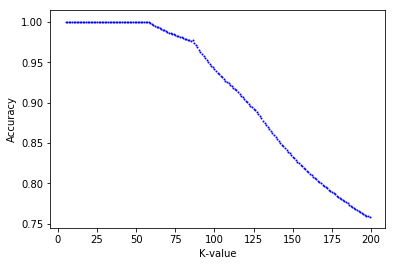

In [40]:
correct=0
total=0
plt.xlabel('K-value')
plt.ylabel('Accuracy')
for k in range(5,200):
    for group in test_set:
        for data in test_set[group]:
            vote=k_nearest_neighbours(train_set,data,k)
            if group == vote:
                correct +=1
            total +=1
    plt.scatter(k,(correct/total),s=1,color='b')   
    print(float(correct/total))

plt.show 


In [41]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [42]:
x=np.array(train_data)
x

array([[5. , 3.6, 1.4, 0.2, 1. ],
       [7.9, 3.8, 6.4, 2. , 3. ],
       [6. , 2.9, 4.5, 1.5, 2. ],
       [6. , 3.4, 4.5, 1.6, 2. ],
       [6.1, 2.8, 4. , 1.3, 2. ],
       [6.4, 2.9, 4.3, 1.3, 2. ],
       [6.9, 3.1, 5.4, 2.1, 3. ],
       [6.5, 3.2, 5.1, 2. , 3. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [5.6, 2.7, 4.2, 1.3, 2. ],
       [5. , 3.5, 1.3, 0.3, 1. ],
       [5.1, 3.4, 1.5, 0.2, 1. ],
       [5.1, 3.8, 1.9, 0.4, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [7.2, 3.2, 6. , 1.8, 3. ],
       [5.8, 2.7, 5.1, 1.9, 3. ],
       [5.8, 2.6, 4. , 1.2, 2. ],
       [6.9, 3.1, 5.1, 2.3, 3. ],
       [6.4, 3.1, 5.5, 1.8, 3. ],
       [7.7, 2.6, 6.9, 2.3, 3. ],
       [6.2, 2.2, 4.5, 1.5, 2. ],
       [5.5, 3.5, 1.3, 0.2, 1. ],
       [5.8, 2.8, 5.1, 2.4, 3. ],
       [6.6, 2.9, 4.6, 1.3, 2. ],
       [5.6, 3. , 4.5, 1.5, 2. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [4.7, 3.2, 1.6, 0.2, 1. ],
       [5.6, 2.8, 4.9, 2. , 3. ],
       [6.3, 2.7, 4.9, 1.8, 3. ],
       [7.2, 3

In [44]:
y=[]
for i in range(len(train_data)):
    y.append(train_data[i][4])

In [45]:
print(y)

[1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0]


In [46]:
np.array(y)
ttrain_data=[]
for i in train_data:
    ttrain_data.append(i[:4])
np.array(ttrain_data)
print (ttrain_data)    

[[5.0, 3.6, 1.4, 0.2], [7.9, 3.8, 6.4, 2.0], [6.0, 2.9, 4.5, 1.5], [6.0, 3.4, 4.5, 1.6], [6.1, 2.8, 4.0, 1.3], [6.4, 2.9, 4.3, 1.3], [6.9, 3.1, 5.4, 2.1], [6.5, 3.2, 5.1, 2.0], [5.1, 3.7, 1.5, 0.4], [5.6, 2.7, 4.2, 1.3], [5.0, 3.5, 1.3, 0.3], [5.1, 3.4, 1.5, 0.2], [5.1, 3.8, 1.9, 0.4], [5.4, 3.7, 1.5, 0.2], [7.2, 3.2, 6.0, 1.8], [5.8, 2.7, 5.1, 1.9], [5.8, 2.6, 4.0, 1.2], [6.9, 3.1, 5.1, 2.3], [6.4, 3.1, 5.5, 1.8], [7.7, 2.6, 6.9, 2.3], [6.2, 2.2, 4.5, 1.5], [5.5, 3.5, 1.3, 0.2], [5.8, 2.8, 5.1, 2.4], [6.6, 2.9, 4.6, 1.3], [5.6, 3.0, 4.5, 1.5], [4.3, 3.0, 1.1, 0.1], [4.7, 3.2, 1.6, 0.2], [5.6, 2.8, 4.9, 2.0], [6.3, 2.7, 4.9, 1.8], [7.2, 3.6, 6.1, 2.5], [7.4, 2.8, 6.1, 1.9], [5.7, 4.4, 1.5, 0.4], [5.0, 3.4, 1.5, 0.2], [5.3, 3.7, 1.5, 0.2], [6.6, 3.0, 4.4, 1.4], [6.2, 3.4, 5.4, 2.3], [6.5, 2.8, 4.6, 1.5], [5.1, 3.3, 1.7, 0.5], [6.3, 2.9, 5.6, 1.8], [5.1, 3.5, 1.4, 0.2], [5.0, 3.0, 1.6, 0.2], [5.6, 2.5, 3.9, 1.1], [6.2, 2.8, 4.8, 1.8], [5.7, 2.8, 4.5, 1.3], [6.7, 3.3, 5.7, 2.5], [4.6, 3.1

In [47]:
neigh.fit(ttrain_data,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
ttest_data=[]
for i in test_data:
    ttest_data.append(i[:4])
np.array(ttest_data)
 
result=neigh.predict(np.array(ttest_data))

In [54]:
print(test_data[0])

[4.8, 3.1, 1.6, 0.2, 1.0]


In [49]:
correct=0
for i in range(len(ttest_data)):
    if result[i]==test_data[i][4]:
        correct+=1

In [50]:
print(correct/len(test_data))

1.0
